## Airline Passenger Satisfaction


The purpose of this project is to create a classification model from a data survey obtained from Kaggle website about passengers flight satisfaction to find the key factors that influence customers satisfaction.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, Lasso, lars_path
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, precision_score, recall_score, precision_recall_curve,f1_score, roc_auc_score, roc_curve, log_loss,classification_report
%matplotlib inline

from ipywidgets import interactive

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

import warnings
warnings.filterwarnings("ignore")


In [2]:
#reading data
df = pd.read_csv('Airline.csv')

In [3]:
df 


,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129876,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
129877,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129878,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


## Exploring the Dataset

In [4]:
#shape of the dataset
df.shape

(129880, 24)

In [5]:
#check the columns
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Satisfaction'],
      dtype='object')

In [6]:
#check datatypes of all  columns.
df.dtypes

id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival De

In [7]:
#check for duplication
print(df.duplicated())

0         False
1         False
2         False
3         False
4         False
          ...  
129875    False
129876    False
129877    False
129878    False
129879    False
Length: 129880, dtype: bool


In [8]:
#check for missing values
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
Satisfaction                           0
dtype: int64

In [9]:
# check for unique values of all columns
df.nunique()

id                                   129880
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3821
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes              466
Arrival Delay in Minutes        

In [10]:
#check for null values 
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
Satisfaction                           0
dtype: int64

## Data Cleaning

In [11]:
#drop null values
df = df.dropna(axis=0)

In [12]:
#check for null values 
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
Satisfaction                         0
dtype: int64

In [13]:
#change data type
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype('float')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129487 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129487 non-null  int64  
 1   Gender                             129487 non-null  object 
 2   Customer Type                      129487 non-null  object 
 3   Age                                129487 non-null  int64  
 4   Type of Travel                     129487 non-null  object 
 5   Class                              129487 non-null  object 
 6   Flight Distance                    129487 non-null  int64  
 7   Inflight wifi service              129487 non-null  int64  
 8   Departure/Arrival time convenient  129487 non-null  int64  
 9   Ease of Online booking             129487 non-null  int64  
 10  Gate location                      129487 non-null  int64  
 11  Food and drink                     1294

In [15]:
#rename a columns
df = df.rename(columns={'Leg room service':'Leg room'})

In [16]:
from string import capwords
df.columns = [capwords(i) for i in df.columns]
df = df.rename(columns={'Departure/arrival Time Convenient':'Departure/Arrival Time Convenience'})

In [17]:
df.head()

,Id,Gender,Customer Type,Age,Type Of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay In Minutes,Arrival Delay In Minutes,Satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,0.0,satisfied


In [18]:
#remove 0 value from the following columns
df = df[(df['Inflight Wifi Service']!=0)&(df['Departure/Arrival Time Convenience']!=0)&(df['Ease Of Online Booking']!=0)&(df['Gate Location'])&(df['Food And Drink']!=0)]


In [19]:
#use dictionary for loyal customer & disloyal customer
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer':'Returning Customer','disloyal Customer':'New Customer'})

In [20]:
df

,Id,Gender,Customer Type,Age,Type Of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay In Minutes,Arrival Delay In Minutes,Satisfaction
0,70172,Male,Returning Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25.0,18.0,neutral or dissatisfied
1,5047,Male,New Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1.0,6.0,neutral or dissatisfied
3,24026,Female,Returning Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11.0,9.0,neutral or dissatisfied
4,119299,Male,Returning Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,0.0,satisfied
5,111157,Female,Returning Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0,0.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,25309,Female,New Customer,36,Business travel,Eco,432,1,5,1,3,4,1,4,4,5,2,5,2,3,4,0.0,0.0,neutral or dissatisfied
129875,78463,Male,New Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0.0,0.0,neutral or dissatisfied
129877,37675,Female,Returning Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0.0,0.0,neutral or dissatisfied
129878,90086,Male,Returning Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0.0,0.0,satisfied


In [21]:
#use dictionary to change satisfied & dissatisfied to 1 & 0 
#sum departure & arrival delay
df['Satisfaction'] = df['Satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
df = df.reset_index()
df = df.drop('index',axis=1)
df['Total Delay'] = df['Departure Delay In Minutes'] + df['Arrival Delay In Minutes']

In [22]:
#copy & drop
DF = df.copy()
df = df.drop('Id',axis=1)

In [23]:
#loss two points from satisfaction 
#drop two unwanted columns 
df = df.reindex(columns=['Satisfaction']+list(df.columns)[:-2]+['Total Delay'])
df = df.drop(['Departure Delay In Minutes','Arrival Delay In Minutes'],axis=1)

In [24]:
#returns the relative frequency by dividing all values by the sum of values
df['Satisfaction'].value_counts(normalize=True)

0    0.56423
1    0.43577
Name: Satisfaction, dtype: float64

In [25]:
##use dictionary to change names
df['Class'] = df['Class'].map({'Eco':'Economy','Eco Plus':'Economy','Business':'Business'})

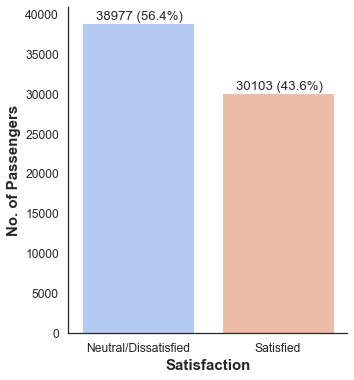

In [26]:
#visualizations
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',palette='coolwarm')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(str(p.get_height())+' ('+str((p.get_height()/len(df)*100).round(1))+'%)', (p.get_x()+0.1, p.get_height()+400))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine()
plt.savefig('targetplot1.png',transparent=True, bbox_inches='tight')

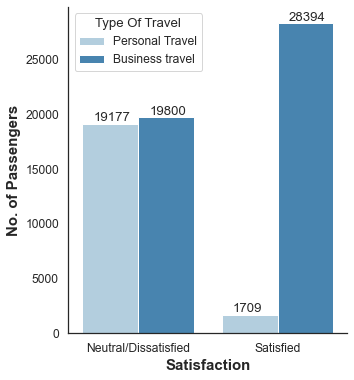

In [27]:
#visualizations
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',hue='Type Of Travel',palette='Blues')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
sns.despine()
plt.savefig('targetplot2.png',transparent=True, bbox_inches='tight')

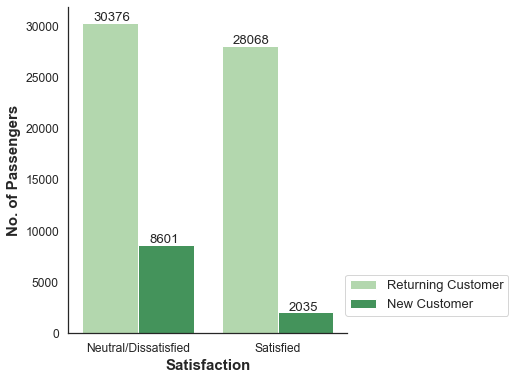

In [28]:
##visualizations
sns.set(style='white',font_scale=1.1)
fig = plt.figure(figsize=[5,6])
ax = sns.countplot(data=df,x='Satisfaction',hue='Customer Type',palette='Greens')
ax.set_xticklabels(['Neutral/Dissatisfied','Satisfied'])
for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x()+0.08, p.get_height()+200))
plt.xlabel('Satisfaction',weight='bold',fontsize='15')   
plt.ylabel('No. of Passengers',weight='bold',fontsize='15')   
plt.legend(loc="upper right", bbox_to_anchor=(1.6, 0.2),fontsize=13)
sns.despine()
plt.savefig('targetplot3.png',transparent=True, bbox_inches='tight')

In [29]:
df['Inflight Wifi Service'].value_counts()

3    20681
1    14925
2    13422
5    10985
4     9067
Name: Inflight Wifi Service, dtype: int64

In [30]:
df

,Satisfaction,Gender,Customer Type,Age,Type Of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Total Delay
0,0,Male,Returning Customer,13,Personal Travel,Economy,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,43.0
1,0,Male,New Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,7.0
2,0,Female,Returning Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,20.0
3,1,Male,Returning Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0
4,0,Female,Returning Customer,26,Personal Travel,Economy,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69075,0,Female,New Customer,36,Business travel,Economy,432,1,5,1,3,4,1,4,4,5,2,5,2,3,4,0.0
69076,0,Male,New Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0.0
69077,0,Female,Returning Customer,17,Personal Travel,Economy,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0.0
69078,1,Male,Returning Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0.0


In [31]:
df1 = pd.get_dummies(df,columns=['Gender','Customer Type','Type Of Travel','Class'],drop_first=True)
df1

,Satisfaction,Age,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Total Delay,Gender_Male,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,43.0,1,1,1,1
1,0,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,7.0,1,0,0,0
2,0,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,20.0,0,1,0,0
3,1,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,1,0,0
4,0,26,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69075,0,36,432,1,5,1,3,4,1,4,4,5,2,5,2,3,4,0.0,0,0,0,1
69076,0,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0.0,1,0,0,0
69077,0,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0.0,0,1,1,1
69078,1,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0.0,1,1,0,0


In [32]:
df1

,Satisfaction,Age,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Total Delay,Gender_Male,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,43.0,1,1,1,1
1,0,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,7.0,1,0,0,0
2,0,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,20.0,0,1,0,0
3,1,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0.0,1,1,0,0
4,0,26,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0.0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69075,0,36,432,1,5,1,3,4,1,4,4,5,2,5,2,3,4,0.0,0,0,0,1
69076,0,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0.0,1,0,0,0
69077,0,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0.0,0,1,1,1
69078,1,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0.0,1,1,0,0


In [33]:
group = df1.groupby(['Satisfaction','Class_Economy'])['Class_Economy'].count()
group

Satisfaction  Class_Economy
0             0                10716
              1                28261
1             0                23597
              1                 6506
Name: Class_Economy, dtype: int64

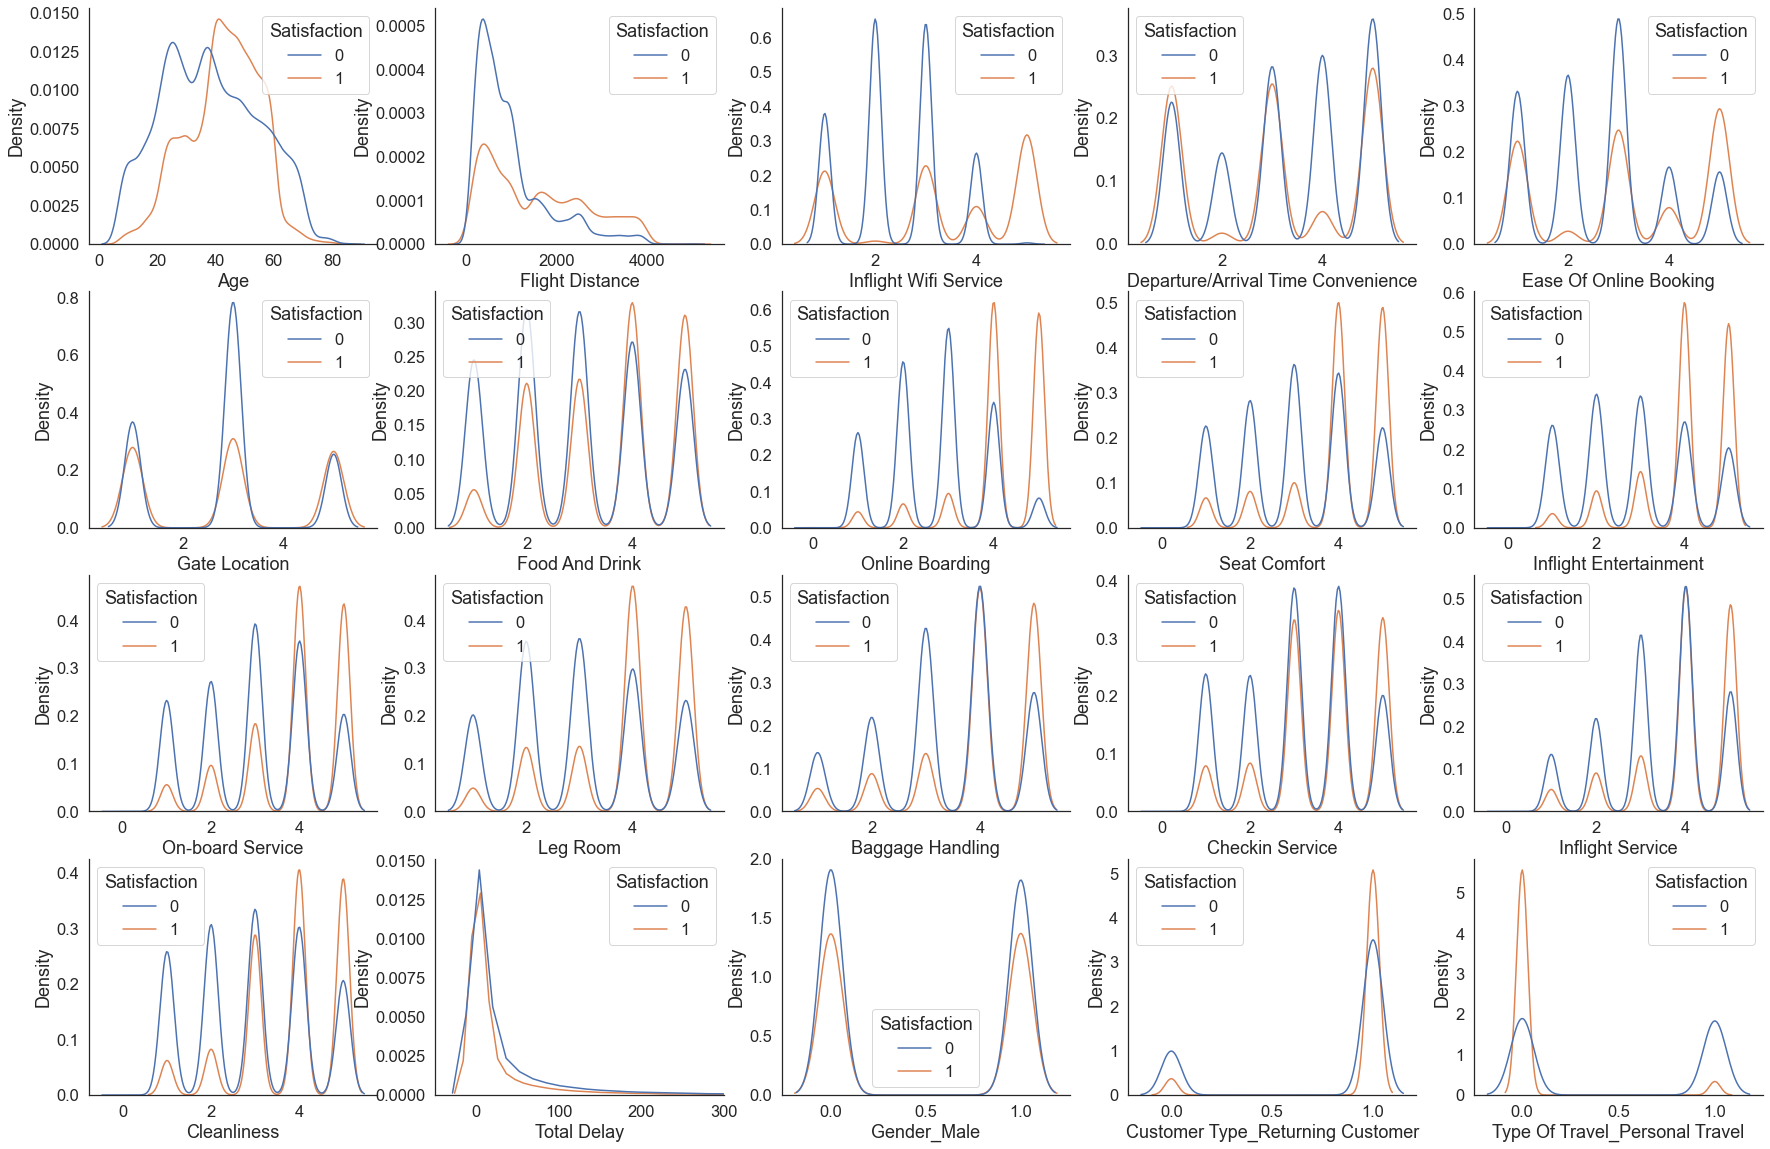

In [34]:
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[30,20])
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    sns.kdeplot(data=df1,x=df1.columns[i+1],hue='Satisfaction')
    if i == 16:
        plt.xlim([-50,300])
    sns.despine()
    plt.savefig('kdeplot.png',transparent=True, bbox_inches='tight')

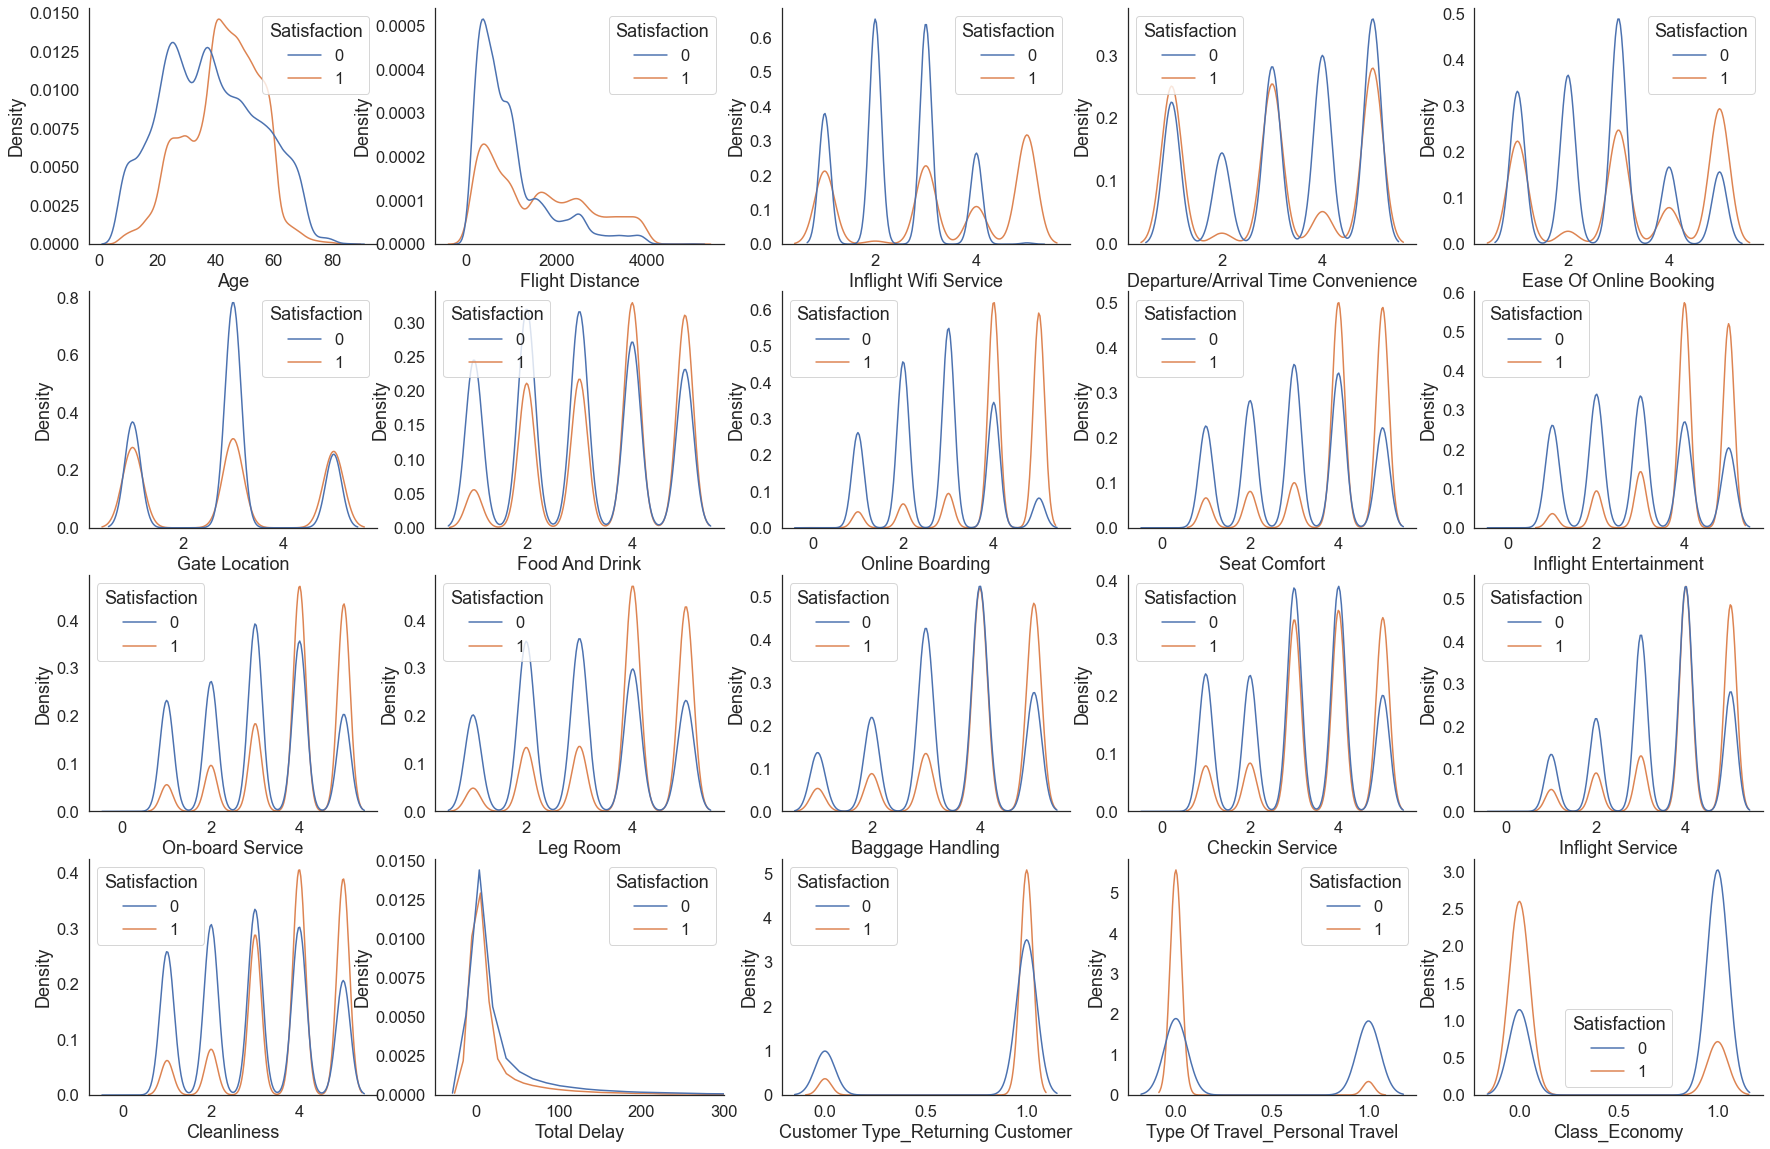

In [35]:
df1 = df1.drop('Gender_Male',axis=1)
sns.set(style='white',font_scale=1.5)
fig = plt.figure(figsize=[30,20])
for i in range(20):
    fig.add_subplot(4, 5, i+1)
    sns.kdeplot(data=df1,x=df1.columns[i+1],hue='Satisfaction')
    if i == 16:
        plt.xlim([-50,300])
    sns.despine()

In [36]:
corr_matrix = df1.corr()
corr_matrix

,Satisfaction,Age,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenience,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Total Delay,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
Satisfaction,1.000000,0.150148,0.303573,0.348685,-0.070199,0.204180,0.043514,0.229749,0.565900,0.372702,0.444813,0.345825,0.344374,0.270941,0.237069,0.268116,0.331150,-0.055821,0.210297,-0.469905,-0.504738
Age,0.150148,1.000000,0.083561,0.015514,-0.018912,0.017283,0.016345,0.022548,0.190513,0.159465,0.081081,0.064431,0.053159,-0.040770,0.037789,-0.046621,0.055301,-0.015938,0.249138,-0.065662,-0.137615
Flight Distance,0.303573,0.083561,1.000000,0.005434,-0.076457,0.050278,0.031355,0.057610,0.195364,0.154660,0.131971,0.115098,0.134020,0.069305,0.074051,0.061727,0.095925,-0.001070,0.199238,-0.280219,-0.468558
Inflight Wifi Service,0.348685,0.015514,0.005434,1.000000,0.441407,0.672502,0.443750,0.141427,0.419654,0.135241,0.216103,0.119020,0.150972,0.112065,0.051611,0.102477,0.144802,-0.025492,0.011744,-0.119077,-0.039472
Departure/Arrival Time Convenience,-0.070199,-0.018912,-0.076457,0.441407,1.000000,0.576568,0.596703,-0.010847,0.043146,-0.020117,-0.036832,0.061342,-0.005858,0.068162,0.099518,0.069238,-0.004809,-0.005004,0.090163,0.257688,0.129900
Ease Of Online Booking,0.204180,0.017283,0.050278,0.672502,0.576568,1.000000,0.599485,0.024530,0.311299,0.024950,0.031253,0.024459,0.079656,0.018987,0.009992,0.017060,0.012296,-0.010493,0.028567,-0.122878,-0.104770
Gate Location,0.043514,0.016345,0.031355,0.443750,0.596703,0.599485,1.000000,0.003225,0.025980,0.016040,0.014579,-0.008729,0.009086,-0.001402,-0.023949,-0.004587,0.000868,0.001213,0.034855,-0.072094,-0.048333
Food And Drink,0.229749,0.022548,0.057610,0.141427,-0.010847,0.024530,0.003225,1.000000,0.263796,0.565523,0.607649,0.065225,0.035823,0.038687,0.096528,0.038295,0.643179,-0.024258,0.057659,-0.069394,-0.089716
Online Boarding,0.565900,0.190513,0.195364,0.419654,0.043146,0.311299,0.025980,0.263796,1.000000,0.453766,0.318622,0.171831,0.141124,0.099861,0.225443,0.090514,0.366148,-0.032841,0.185644,-0.220211,-0.320842
Seat Comfort,0.372702,0.159465,0.154660,0.135241,-0.020117,0.024950,0.016040,0.565523,0.453766,1.000000,0.607617,0.144099,0.114388,0.082161,0.202223,0.079527,0.674745,-0.029809,0.151476,-0.134646,-0.237359


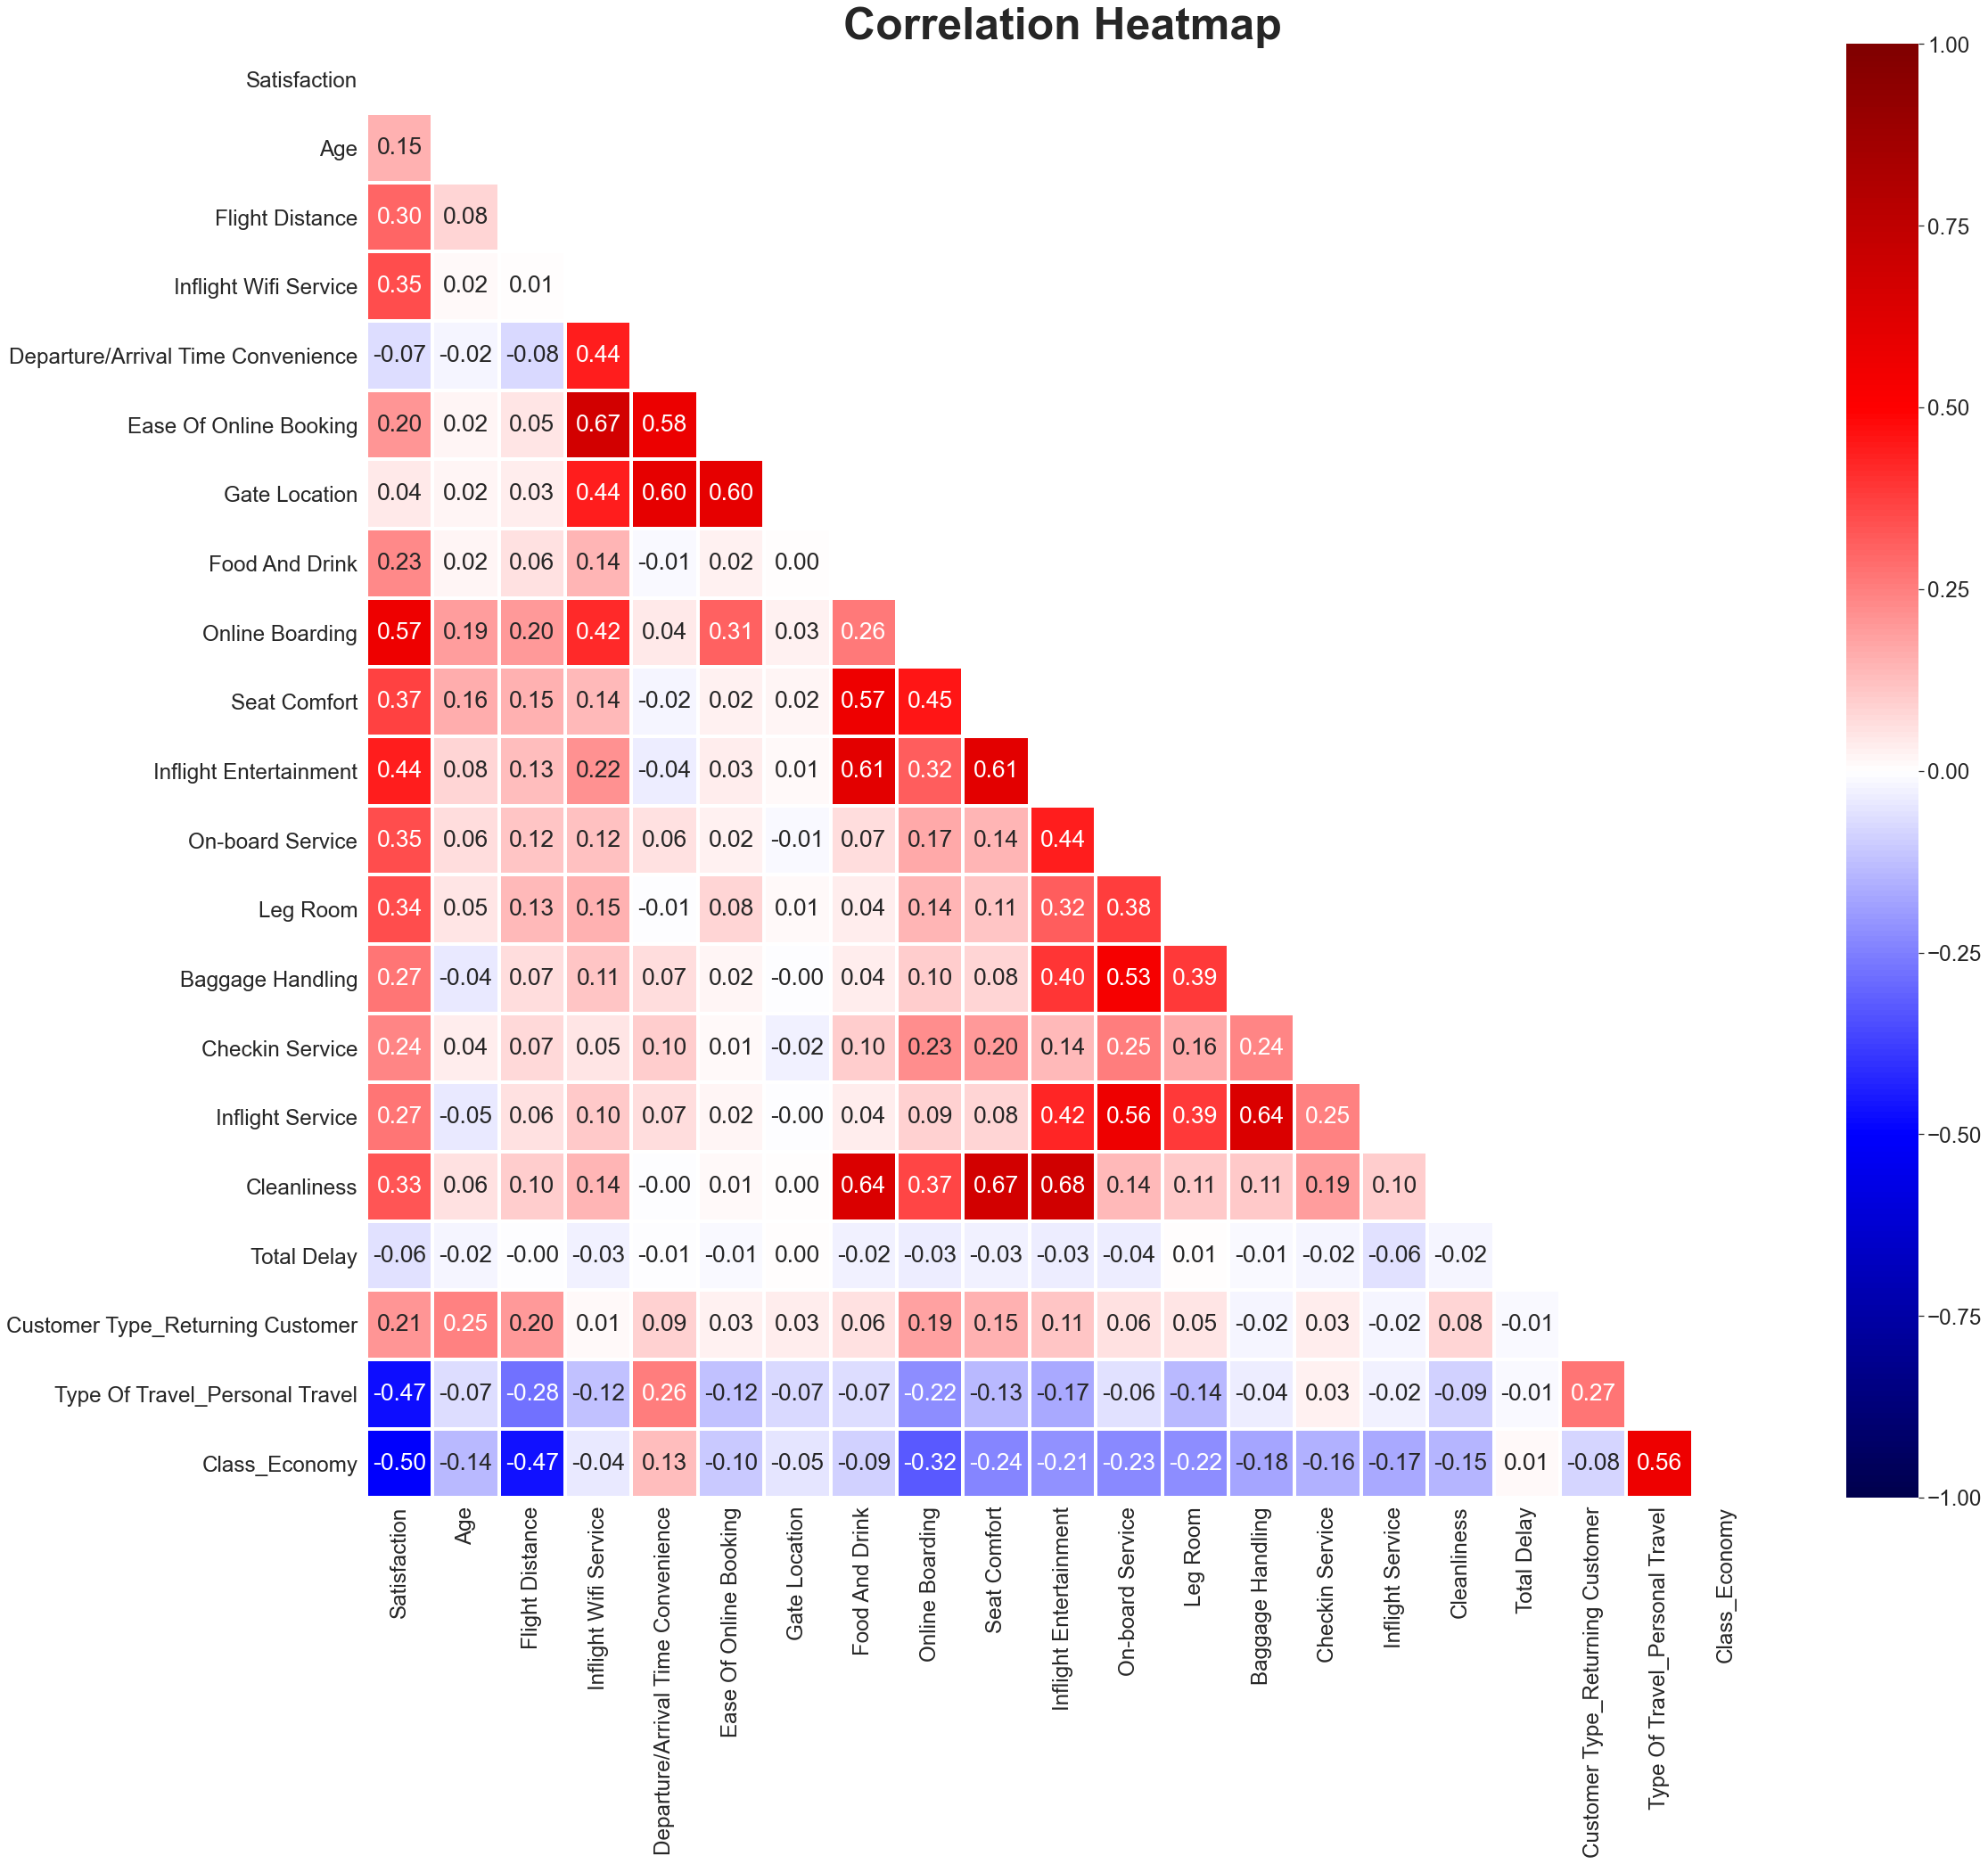

In [37]:
sns.set(style='white',font_scale=2.2)
fig = plt.figure(figsize=[35,30])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(150, 0, as_cmap=True)
sns.heatmap(corr_matrix,cmap='seismic',linewidth=3,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=50)
plt.savefig('heatmap.png',transparent=True, bbox_inches='tight')

In [38]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69080 entries, 0 to 69079
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Satisfaction                        69080 non-null  int64  
 1   Age                                 69080 non-null  int64  
 2   Flight Distance                     69080 non-null  int64  
 3   Inflight Wifi Service               69080 non-null  int64  
 4   Departure/Arrival Time Convenience  69080 non-null  int64  
 5   Ease Of Online Booking              69080 non-null  int64  
 6   Gate Location                       69080 non-null  int64  
 7   Food And Drink                      69080 non-null  int64  
 8   Online Boarding                     69080 non-null  int64  
 9   Seat Comfort                        69080 non-null  int64  
 10  Inflight Entertainment              69080 non-null  int64  
 11  On-board Service                    69080

## Logistic Regression

In [39]:
y = df1['Satisfaction']
X = df1.drop('Satisfaction',axis=1)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state = 71)
Cvec = np.linspace(0.001,2,100)
logit_model = LogisticRegressionCV(Cs = Cvec, cv=kf,max_iter=10000)
logit_model.fit(X_train_val, y_train_val)
logit_model.C_

array([0.14234343])

In [40]:
logit_model = LogisticRegression(C=logit_model.C_[0],max_iter=10000)
Mean_AUC_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_Logit_CV 

0.9615598639969452

In [41]:
Mean_Precision_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_Logit_CV 

0.8839473466530631

In [42]:
Mean_Recall_Logit_CV = np.mean(cross_val_score(logit_model, X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_Logit_CV 

0.8800999201969324

## KNN 

In [43]:
X_train_val = X_train_val.reset_index().drop('index',axis=1)
y_train_val = y_train_val.reset_index().drop('index',axis=1)

In [44]:
Mean_AUC_KNN_CV = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_KNN_CV 

0.7998034159950198

In [45]:
Mean_Precision_KNN_CV = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_KNN_CV 

0.7107071522553523

In [46]:
Mean_Recall_KNN_CV = np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=7), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_KNN_CV 

0.6669886309106503

## Gaussian Naive Bayes

In [47]:
Mean_AUC_NB_CV = np.mean(cross_val_score(GaussianNB(), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_NB_CV 

0.9448440634873887

In [48]:
Mean_Precision_NB_CV = np.mean(cross_val_score(GaussianNB(), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_NB_CV 

0.8893704758533026

In [49]:
Mean_Recall_NB_CV = np.mean(cross_val_score(GaussianNB(), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_NB_CV 

0.8404804318782595

## Decision Trees

In [50]:
Mean_AUC_tree_CV = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=12), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_tree_CV

0.9773008114373912

In [51]:
Mean_Precision_tree_CV = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=12), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_tree_CV 

0.9578586889090464

In [52]:
Mean_Recall_tree_CV = np.mean(cross_val_score(DecisionTreeClassifier(max_depth=12), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_tree_CV 

0.9275950504448627

## Random Forest

In [53]:
Mean_AUC_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_forest_CV


0.9939214471155335

In [54]:
Mean_Precision_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_forest_CV

0.973499733422211

In [55]:
Mean_Recall_forest_CV = np.mean(cross_val_score(RandomForestClassifier(max_depth=17,random_state=42), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_forest_CV

0.9401416612209623

In [56]:
#create new values for visualization
Log_Model = LogisticRegression(C=0.04138384,max_iter=10000)
KNN_Model = KNeighborsClassifier(n_neighbors=7)
NB_Model = GaussianNB()
Tree_Model = DecisionTreeClassifier(max_depth=12)
Forest_Model = RandomForestClassifier(max_depth=17,random_state=42)

model_list = [Log_Model,KNN_Model,NB_Model,Tree_Model,Forest_Model]
model_names = ["log_model", "knn_model", "nb_model", "tree_model", "forest_model"]
model = list(zip(model_names, model_list))

## Ensemble 

In [57]:
Mean_AUC_ensemble_CV = np.mean(cross_val_score(VotingClassifier(estimators=model,voting='soft',n_jobs=-1), X_train_val, y_train_val, cv=kf, scoring='roc_auc'))
Mean_AUC_ensemble_CV

0.9835523971400472

In [58]:
Mean_Precision_ensemble_CV = np.mean(cross_val_score(VotingClassifier(estimators=model,voting='soft',n_jobs=-1), X_train_val, y_train_val, cv=kf, scoring='precision'))
Mean_Precision_ensemble_CV

0.9478754995478333

In [59]:
Mean_Recall_ensemble_CV = np.mean(cross_val_score(VotingClassifier(estimators=model,voting='soft',n_jobs=-1), X_train_val, y_train_val, cv=kf, scoring='recall'))
Mean_Recall_ensemble_CV

0.9096763739300975

In [60]:
#comparing all model's scoring
model = ['Logistic Regression','KNN','Gaussian NB','Decision Trees','Random Forest','Ensemble']
scoring = ['AUC','Precision','Recall']
model_name = ['Logit','KNN','NB','tree','forest','ensemble']
model_list = []

for i in model:
    for j in scoring:
        model_dic = {'Model': i,'Scoring':j, 'Score':eval('Mean_{0}_{1}_CV'.format(j,model_name[model.index(i)]))}
        model_list.append(model_dic)

In [61]:
model_df = pd.DataFrame(model_list)
model_df

,Model,Scoring,Score
0,Logistic Regression,AUC,0.961560
1,Logistic Regression,Precision,0.883947
2,Logistic Regression,Recall,0.880100
3,KNN,AUC,0.799803
4,KNN,Precision,0.710707
5,KNN,Recall,0.666989
6,Gaussian NB,AUC,0.944844
7,Gaussian NB,Precision,0.889370
8,Gaussian NB,Recall,0.840480
9,Decision Trees,AUC,0.977301


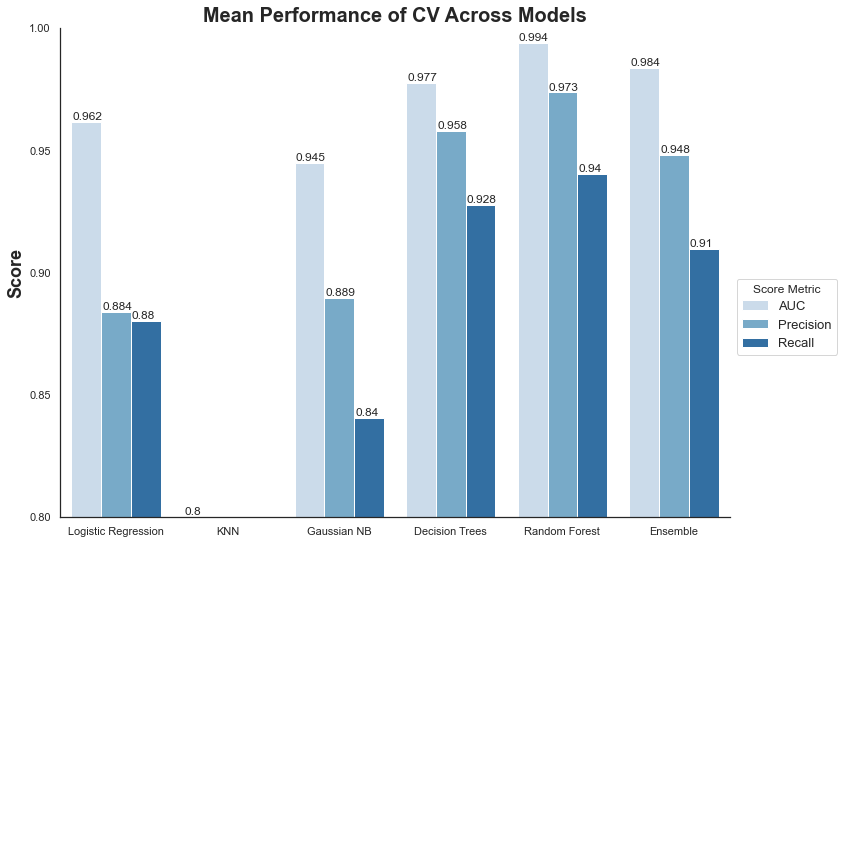

In [62]:
sns.set(style='white',font_scale=1)
fig = plt.figure(figsize=[12,9])
ax = sns.barplot(x='Model',y='Score',data=model_df,hue='Scoring',palette='Blues')
for p in ax.patches:
        ax.annotate(p.get_height().round(3), (p.get_x()+0.01, p.get_height()+0.001))
plt.legend(title='Score Metric',loc="upper right", bbox_to_anchor=(1.17, 0.5),fontsize=13)
plt.ylim([0.8,1.0])
plt.yticks([0.80,0.85,0.90,0.95,1.00])
plt.xlabel('',weight='bold',fontsize='15')
plt.ylabel('Score',weight='bold',fontsize='18')
plt.title('Mean Performance of CV Across Models',weight='bold',fontsize=20)
sns.despine()
plt.savefig('modelbarplot.png',transparent=True, bbox_inches='tight')

In [63]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25,random_state=42)

In [64]:
rf = RandomForestClassifier(max_depth=17, random_state=42)
rf.fit(X_train,y_train)
print("Random Forest score: {:.4f}".format(rf.score(X_train,y_train)))

Random Forest score: 0.9936


In [65]:
y_predict = rf.predict_proba(X_val)[:, 1] >= 0.5
precision_05 = precision_score(y_val, y_predict)
precision_05

0.9759117896522477

In [66]:
recall_05=recall_score(y_val, y_predict)
recall_05

0.9388054830287206

## Threshold

In [75]:
interactive(lambda threshold: make_confusion_matrix(rf, threshold), threshold=(0.0,1.0,0.02)) 


interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.02), Output()), _dom_cla…

In [68]:
y_predict = rf.predict_proba(X_val)[:, 1] >= 0.7
precision_07 = precision_score(y_val, y_predict)
precision_07

0.9947320617620345

In [69]:
recall_07=recall_score(y_val, y_predict)
recall_07

0.893603133159269

In [70]:
roc_auc_score(y_val, rf.predict_proba(X_val)[:, 1])

0.9938068941322545

In [71]:
SV_model = [{'Scoring':'Precision','Threshold':0.5,'Score':precision_05},{'Scoring':'Precision','Threshold':0.7,'Score':precision_07},{'Scoring':'Recall','Threshold':0.5,'Score':recall_05},{'Scoring':'Recall','Threshold':0.7,'Score':recall_07}]
SV_model = pd.DataFrame(SV_model)
SV_model

,Scoring,Threshold,Score
0,Precision,0.5,0.975912
1,Precision,0.7,0.994732
2,Recall,0.5,0.938805
3,Recall,0.7,0.893603


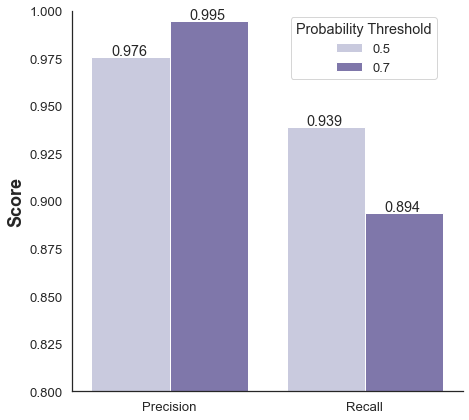

In [72]:
sns.set(style='white',font_scale=1.2)
fig = plt.figure(figsize=[7,7])
ax = sns.barplot(x='Scoring',y='Score',data=SV_model,hue='Threshold',palette='Purples')
for p in ax.patches:
        ax.annotate(p.get_height().round(3), (p.get_x()+0.1, p.get_height()+0.001))
plt.legend(title='Probability Threshold',loc="upper right", bbox_to_anchor=(0.95, 1),fontsize=13)
plt.ylim([0.8,1.0])
plt.xlabel('',weight='bold',fontsize='15')
plt.ylabel('Score',weight='bold',fontsize='18')
sns.despine()
plt.savefig('probabilityplot.png',transparent=True, bbox_inches='tight')

## Evaluation
we have selected Random Forest with depth=17 and threshold>=0.7.

In [76]:
rf = RandomForestClassifier(max_depth=17,random_state=42)
rf.fit(X_train_val,y_train_val)
print("Random Forest score: {:.4f}".format(rf.score(X_train_val,y_train_val)))

Random Forest score: 0.9919


In [77]:
def make_confusion_matrix2(model, threshold=0.7):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    satisfaction_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=120)
    ax = sns.heatmap(satisfaction_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['Neutral/Dissatisfied', 'Satisfied'],
           yticklabels=['Neutral/Dissatisfied', 'Satisfied']);   
    plt.xlabel('Prediction',weight='bold',fontsize=12)
    plt.ylabel('Actual',weight='bold',fontsize=12)
    plt.title('Confusion Matrix',weight='bold',fontsize=15)

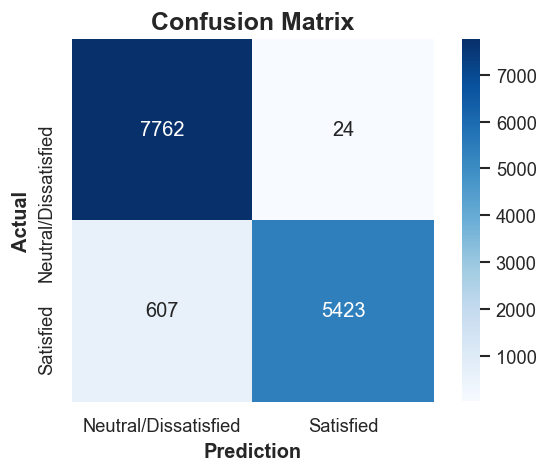

In [78]:
sns.set(style='white',font_scale=1)
make_confusion_matrix2(rf)
plt.savefig('confusionplot.png',transparent=True, bbox_inches='tight')

In [79]:
y_predict = rf.predict_proba(X_test)[:, 1]>=0.7
precision_score(y_test, y_predict)

0.9955939049017808

In [80]:
recall_score(y_test, y_predict)

0.8993366500829187

In [81]:
f1_score(y_test, y_predict)

0.9450204757340768

In [82]:
roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

0.9936341603055874

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

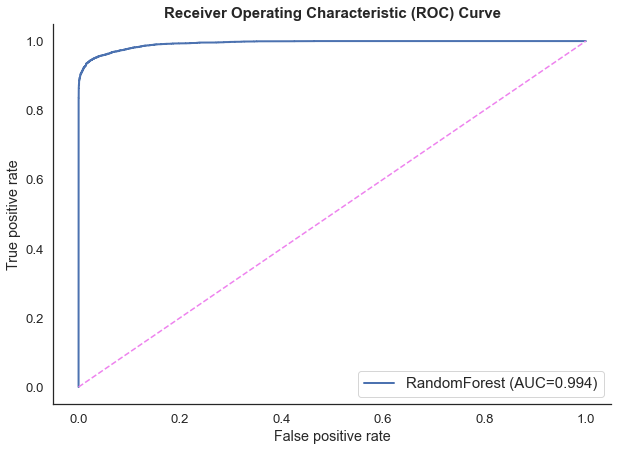

In [84]:
sns.set(style='white',font_scale=1.2)
fig = plt.figure(figsize=[10,7])
plt.plot(fpr, tpr,lw=2,label='RandomForest (AUC={:.3f})'.format(roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])))
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.legend(loc="lower right",fontsize=15)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic (ROC) Curve',weight='bold',fontsize=15);
sns.despine()

In [85]:
rf.feature_importances_

array([0.02856741, 0.0329617 , 0.15931033, 0.0212841 , 0.02606311,
       0.0114281 , 0.01137827, 0.18519183, 0.04867924, 0.06222156,
       0.03253786, 0.04108863, 0.02178961, 0.01942254, 0.02409921,
       0.02796332, 0.01213423, 0.03617392, 0.09377229, 0.10393273])

In [86]:
df_impt = pd.DataFrame({'features':X_train_val.columns,'importance':rf.feature_importances_})
df_impt = df_impt.sort_values(by='importance',ascending=True)
df_impt

,features,importance
6,Food And Drink,0.011378
5,Gate Location,0.011428
16,Total Delay,0.012134
13,Checkin Service,0.019423
3,Departure/Arrival Time Convenience,0.021284
12,Baggage Handling,0.021790
14,Inflight Service,0.024099
4,Ease Of Online Booking,0.026063
15,Cleanliness,0.027963
0,Age,0.028567


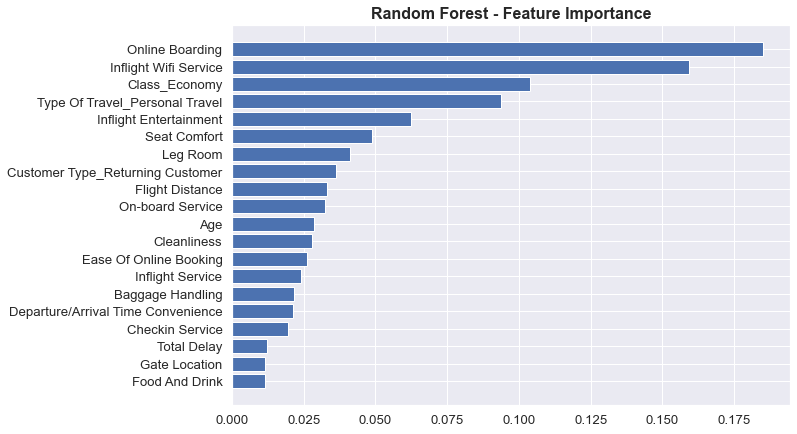

In [87]:
sns.set(style='darkgrid',font_scale=1.2)
fig = plt.figure(figsize=[10,7])
ax = plt.barh(df_impt['features'],df_impt['importance'])
plt.title('Random Forest - Feature Importance',weight='bold',fontsize=16)
plt.savefig('featureplot.png',transparent=True, bbox_inches='tight')

In [88]:
Test_Set = pd.DataFrame(y_test).join(X_test).join(pd.DataFrame(DF['Id']))
Test_Set['Predicted Satisfaction'] = (rf.predict_proba(X_test)[:, 1]>=0.7).astype(int)
Test_Set = Test_Set[['Satisfaction','Predicted Satisfaction','Inflight Wifi Service','Ease Of Online Booking','Food And Drink','Online Boarding','Seat Comfort','Inflight Entertainment','On-board Service','Leg Room','Baggage Handling','Checkin Service','Inflight Service','Cleanliness','Customer Type_Returning Customer','Type Of Travel_Personal Travel','Class_Economy']]
Test_Set.reset_index(inplace=True)
Test_Set.drop('index',axis=1,inplace=True)
Test_Set['Satisfaction'] = Test_Set['Satisfaction'].map({0:'Neutral/Dissatisfied',1:'Satisfied'})
Test_Set['Predicted Satisfaction'] = Test_Set['Predicted Satisfaction'].map({0:'Neutral/Dissatisfied',1:'Satisfied'})
Test_Set

,Satisfaction,Predicted Satisfaction,Inflight Wifi Service,Ease Of Online Booking,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
0,Neutral/Dissatisfied,Neutral/Dissatisfied,4,3,4,4,4,4,2,4,4,1,4,4,1,0,1
1,Satisfied,Satisfied,1,1,4,4,5,4,4,5,5,3,4,4,1,0,0
2,Satisfied,Satisfied,1,1,5,4,4,4,4,4,4,3,4,4,1,0,0
3,Neutral/Dissatisfied,Neutral/Dissatisfied,4,3,5,4,3,2,2,2,4,1,2,4,1,0,0
4,Satisfied,Satisfied,3,3,2,5,5,4,4,4,4,3,4,5,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13811,Neutral/Dissatisfied,Neutral/Dissatisfied,3,3,1,3,1,1,3,3,3,2,4,1,0,0,0
13812,Satisfied,Neutral/Dissatisfied,4,4,3,4,3,3,1,3,3,2,5,3,0,0,1
13813,Satisfied,Satisfied,3,3,5,5,5,5,5,5,5,3,5,5,1,0,0
13814,Satisfied,Satisfied,5,5,5,5,4,5,5,5,5,4,5,5,1,0,0


In [89]:
Test_Set[(Test_Set['Class_Economy']==0)&(Test_Set['Satisfaction']=='Satisfied')&(Test_Set['Type Of Travel_Personal Travel']==0)&((Test_Set['Inflight Wifi Service']!=5))].head(100)


,Satisfaction,Predicted Satisfaction,Inflight Wifi Service,Ease Of Online Booking,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-board Service,Leg Room,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Customer Type_Returning Customer,Type Of Travel_Personal Travel,Class_Economy
1,Satisfied,Satisfied,1,1,4,4,5,4,4,5,5,3,4,4,1,0,0
2,Satisfied,Satisfied,1,1,5,4,4,4,4,4,4,3,4,4,1,0,0
4,Satisfied,Satisfied,3,3,2,5,5,4,4,4,4,3,4,5,1,0,0
6,Satisfied,Satisfied,3,3,5,5,5,2,2,2,2,4,2,3,1,0,0
10,Satisfied,Satisfied,1,1,4,4,4,4,5,3,5,3,5,4,1,0,0
18,Satisfied,Satisfied,3,3,5,4,5,5,5,5,5,3,5,5,1,0,0
22,Satisfied,Satisfied,3,4,3,5,4,5,5,5,5,4,5,4,1,0,0
28,Satisfied,Satisfied,1,5,4,4,4,4,5,3,5,4,5,4,1,0,0
29,Satisfied,Satisfied,1,1,4,4,5,3,3,4,3,3,3,4,1,0,0
31,Satisfied,Satisfied,3,5,5,4,5,3,3,3,3,3,3,5,1,0,0
